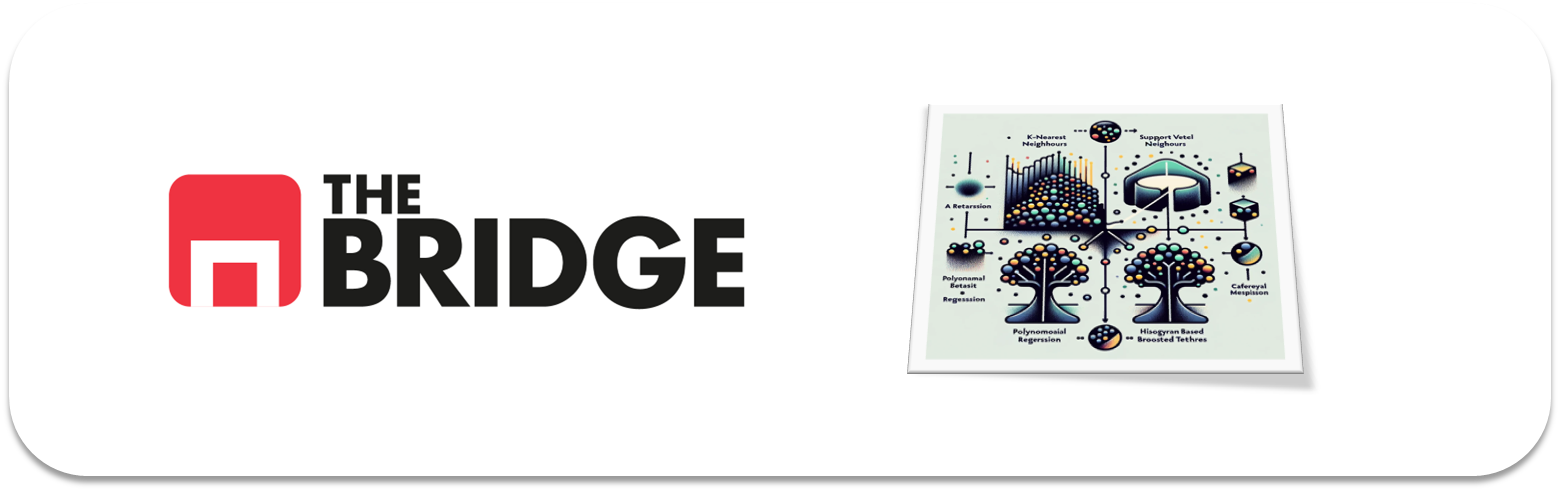

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from toolbox_ML import *


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv", sep = ",")

In [3]:
df.head(7)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
# Obtén los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Inicializa listas para almacenar nombres de columnas numéricas y categóricas
columnas_numericas = []
columnas_categoricas = []

# Itera sobre cada columna y clasifícala como numérica o categórica
for columna, tipo in tipos_de_datos.items():
    if pd.api.types.is_numeric_dtype(tipo):
        columnas_numericas.append(columna)
    else:
        columnas_categoricas.append(columna)

# Muestra las columnas numéricas y categóricas
print("Columnas numéricas:")
print(columnas_numericas)
print("\nColumnas categóricas:")
print(columnas_categoricas)

Columnas numéricas:
['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

Columnas categóricas:
[]


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Problema relacionado con prediccion de deuda en los próximos dos años. 

In [6]:
target= 'SeriousDlqin2yrs'

### #1.3
Pinta la distribución de frecuencias del target y coméntala

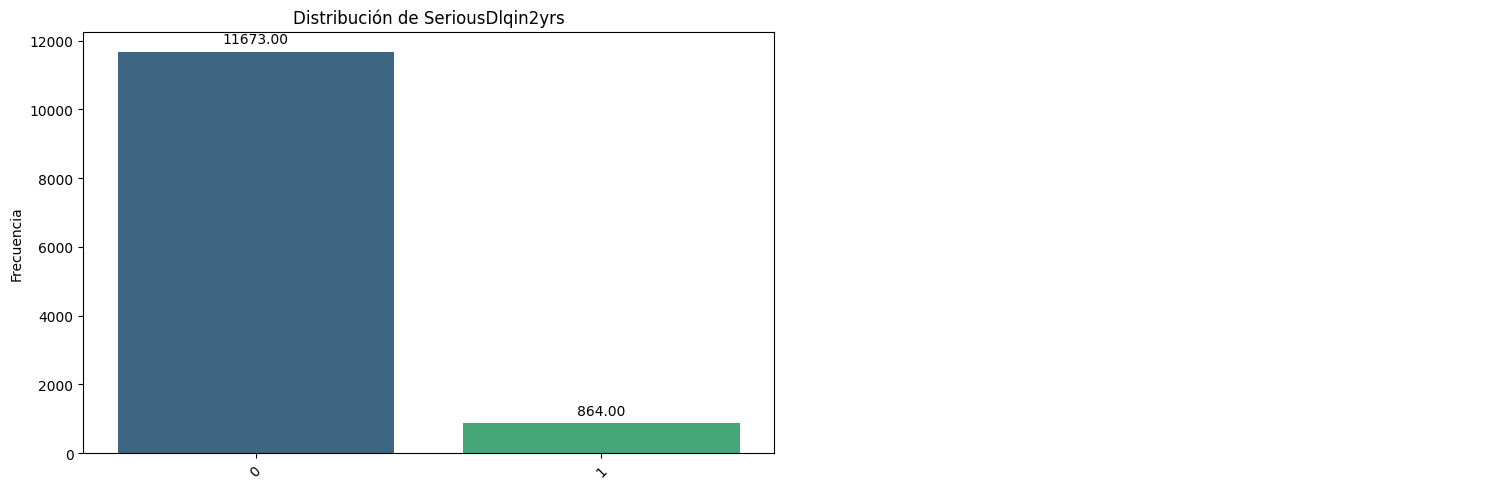

In [7]:
bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True)

Muy desequilibrada 

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

Train y test

In [8]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

Variables con nulos se aplica moda

In [9]:
# Definir los nombres de las columnas
ndep = "NumberOfDependents"
minc = "MonthlyIncome"

# Calcular la moda para cada columna en el conjunto de entrenamiento
ndep_moda = train_set[ndep].mode()[0]
minc_moda = train_set[minc].mode()[0]

# Reemplazar los valores faltantes con la moda en el conjunto de entrenamiento
train_set[ndep] = train_set[ndep].fillna(ndep_moda)
train_set[minc] = train_set[minc].fillna(minc_moda)

# Reemplazar los valores faltantes con la moda en el conjunto de prueba
test_set[ndep] = test_set[ndep].fillna(ndep_moda)
test_set[minc] = test_set[minc].fillna(minc_moda)

# Verificar que los valores faltantes hayan sido reemplazados
print("Valores faltantes en el conjunto de entrenamiento después de imputar:")
print(train_set.isna().sum())

print("Valores faltantes en el conjunto de prueba después de imputar:")
print(test_set.isna().sum())

Valores faltantes en el conjunto de entrenamiento después de imputar:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
Valores faltantes en el conjunto de prueba después de imputar:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10029 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 2   age                                   10029 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64  
 4   DebtRatio                             10029 non-null  float64
 5   MonthlyIncome                         10029 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       10029 non-null  int64  
 7   NumberOfTimes90DaysLate               10029 non-null  int64  
 8   NumberRealEstateLoansOrLines          10029 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64  
 10  NumberOfDependents                    10029 non-null  float64
dtypes: float64(4), int

#### Mini Eda

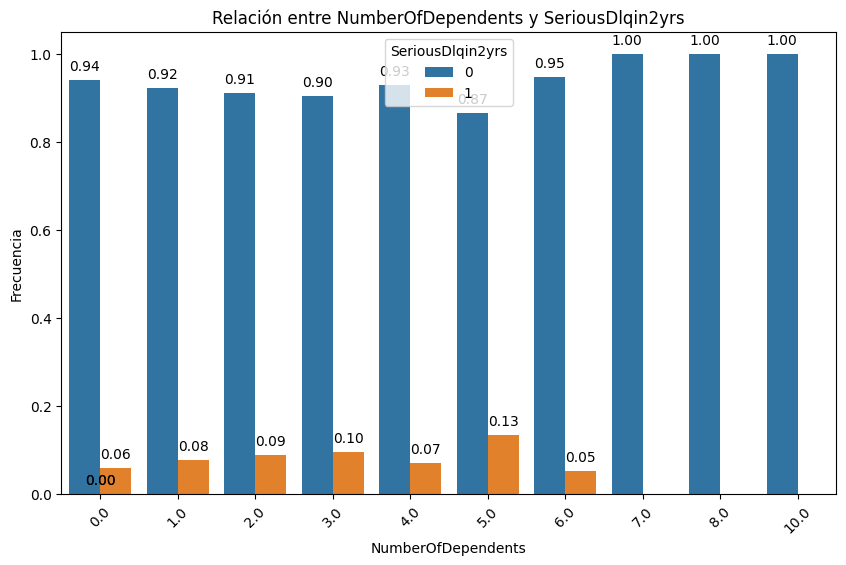

In [50]:
bt.plot_categorical_relationship_fin(train_set,ndep, target,show_values=True, relative_freq=True, size_group=10)

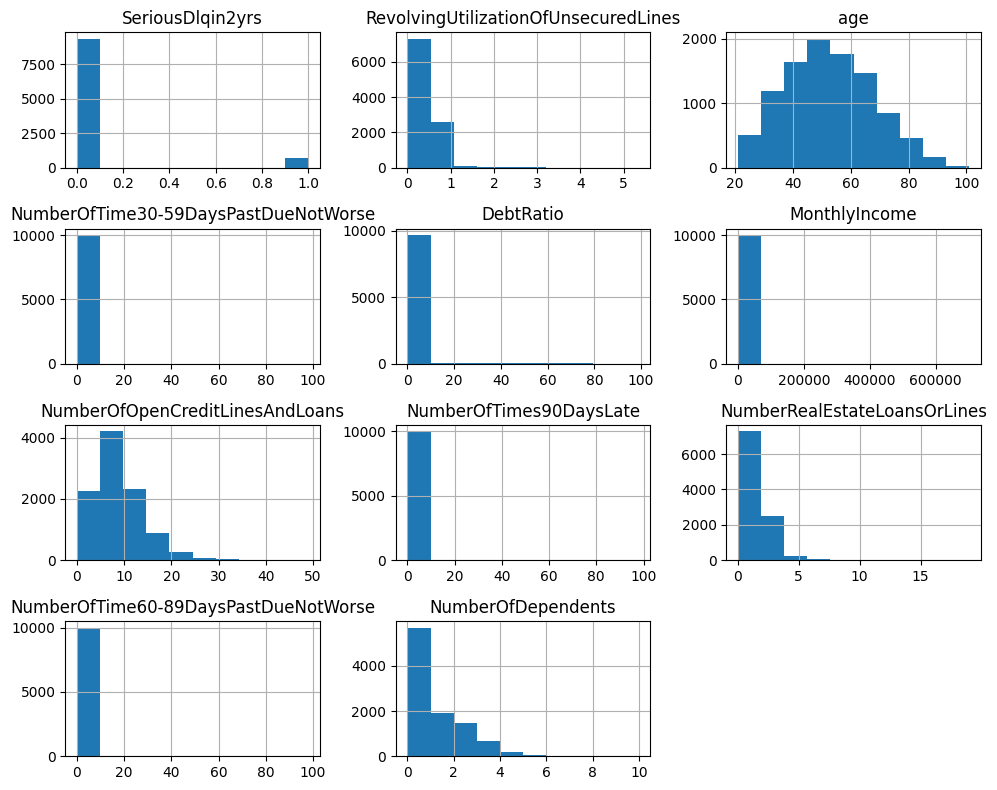

In [11]:
train_set[columnas_numericas].hist(figsize=(10, 8))
plt.tight_layout()


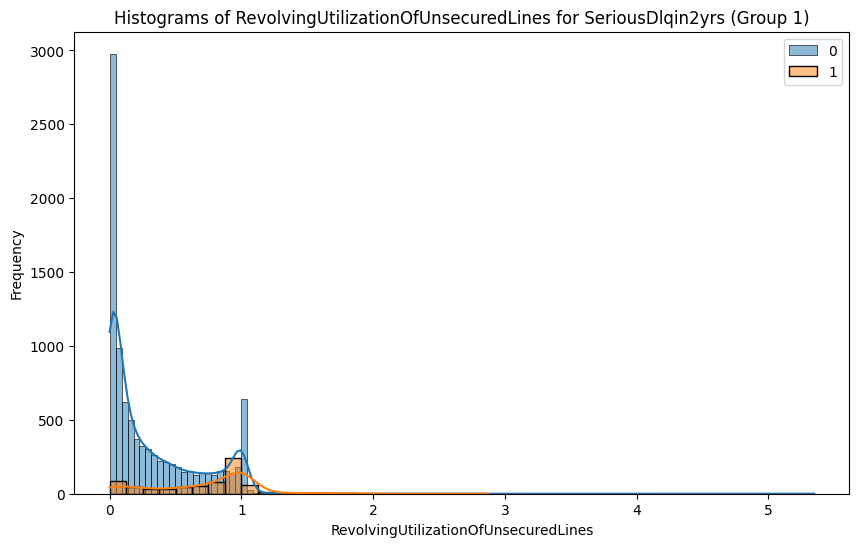

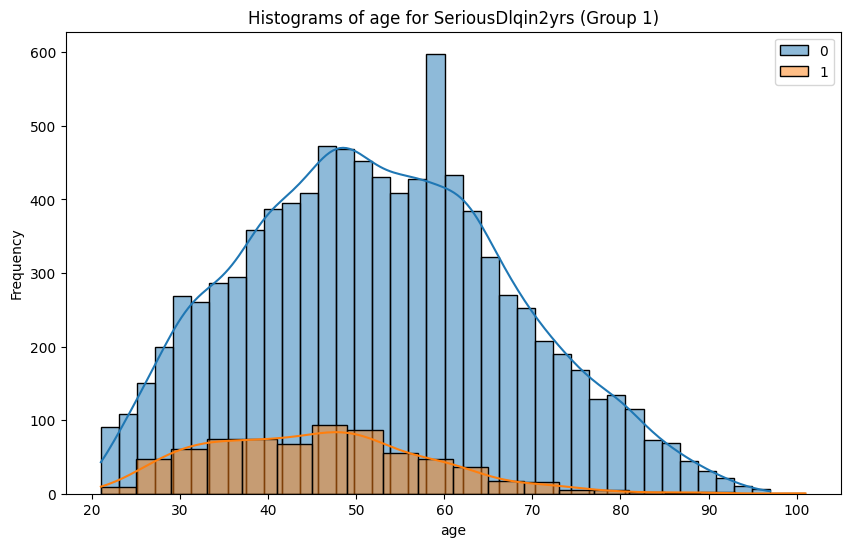

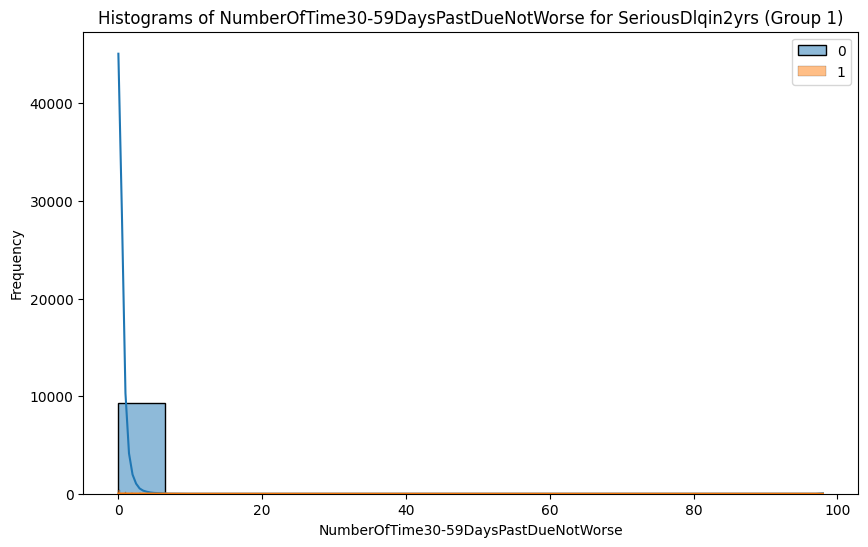

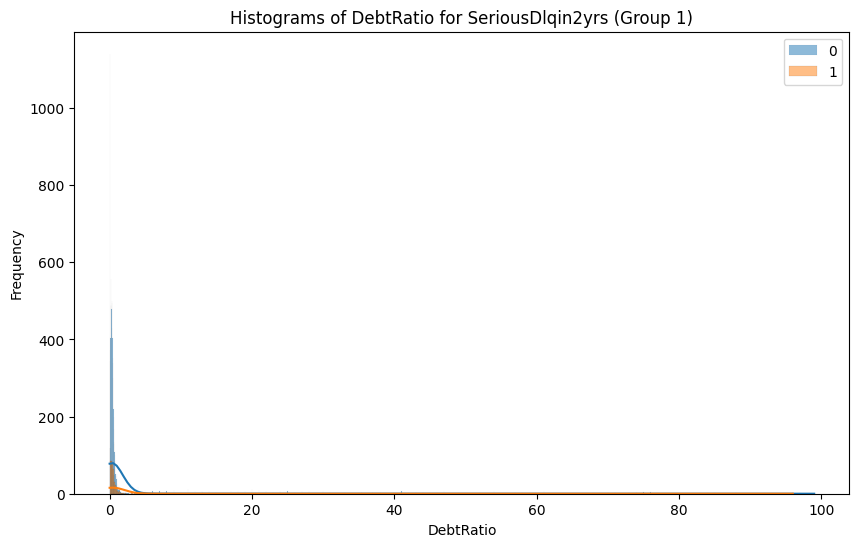

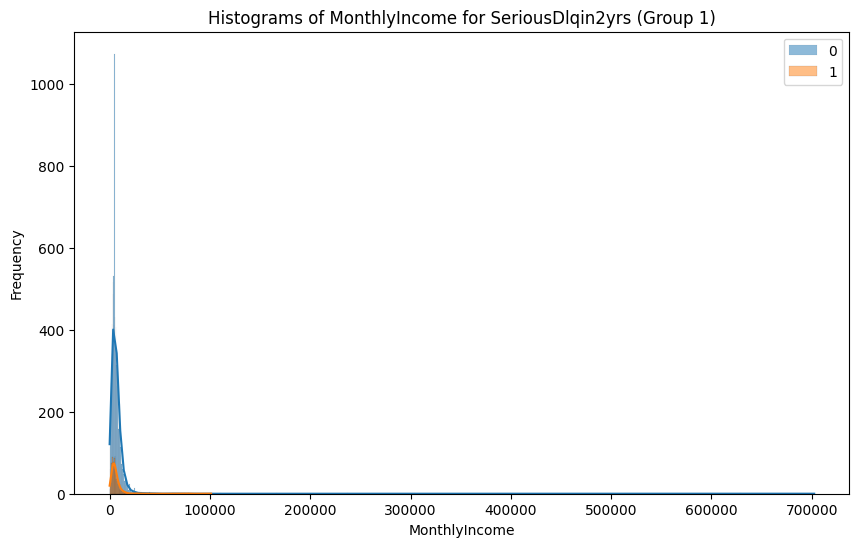

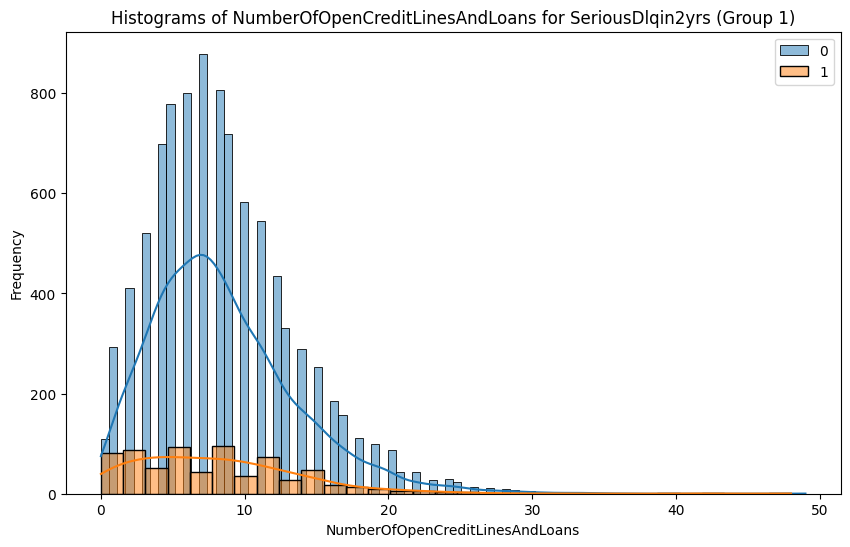

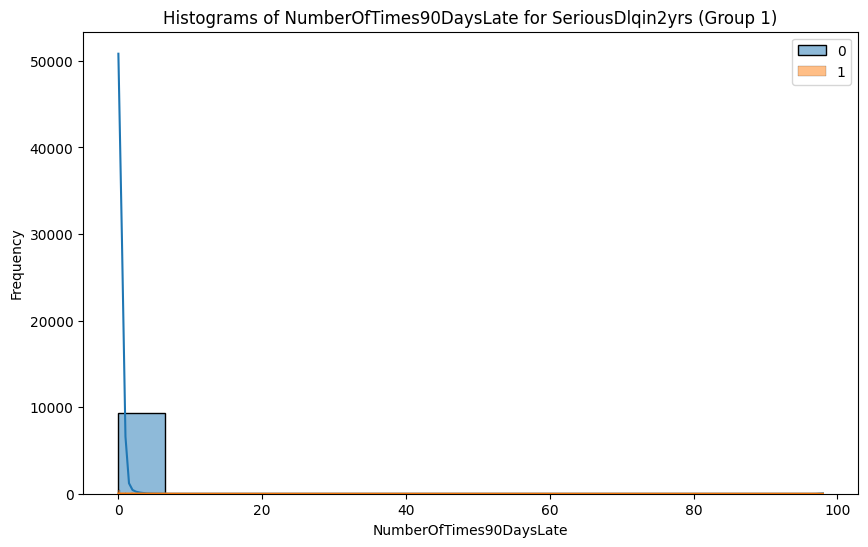

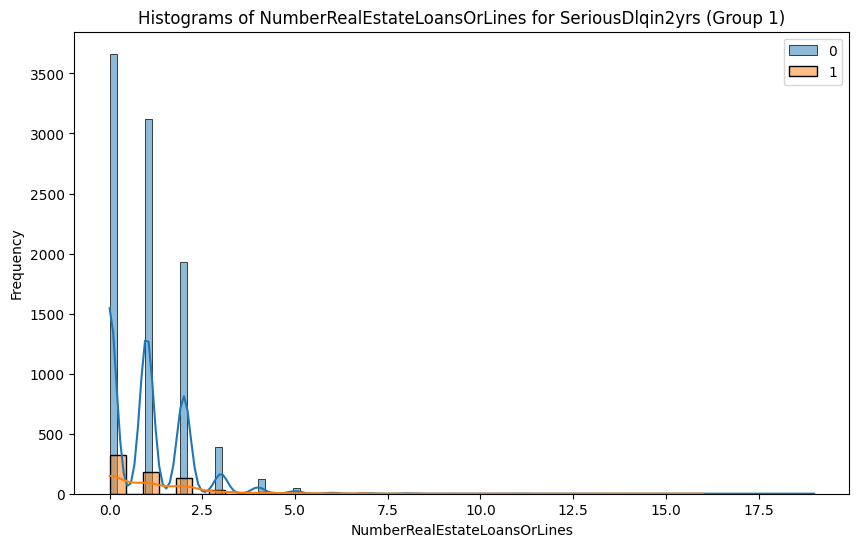

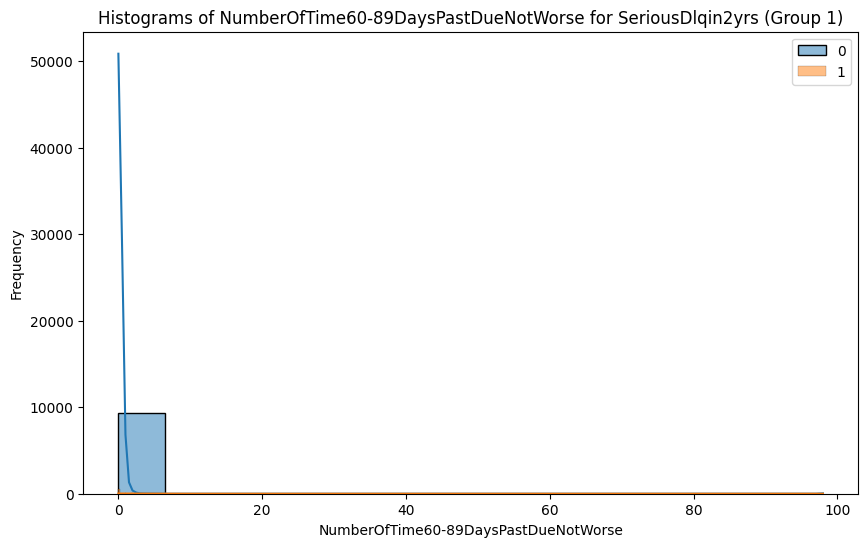

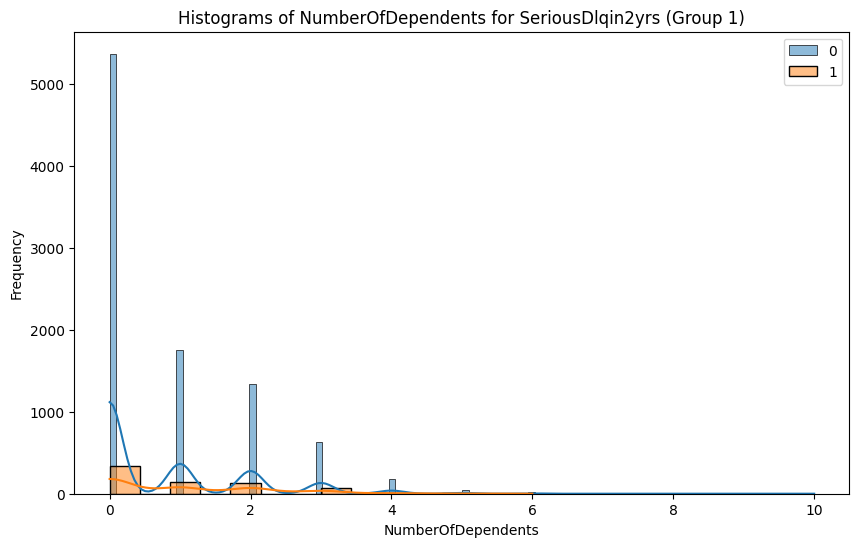

In [12]:
features = [col for col in train_set.columns if col != target]
for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

Mantenemos todas, aunque Monthly income podría quitarse

In [13]:
get_features_cat_regression(train_set, target, pvalue=0.05)

No hay columnas categóricas en el dataframe.


In [14]:
get_features_num_regression(train_set, target, 0.05)


['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

Correlación y colinearidad

In [15]:
target

'SeriousDlqin2yrs'

In [16]:
# Calcular la matriz de correlación
matriz_correlacion = train_set[columnas_numericas].corr()
matriz_correlacion

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.285014,-0.118734,0.109462,-0.022599,-0.019931,-0.021952,0.111849,0.010861,0.089596,0.047237
RevolvingUtilizationOfUnsecuredLines,0.285014,1.000000,-0.283100,0.112125,-0.061240,-0.042466,-0.156499,0.106524,-0.072853,0.088548,0.076745
age,-0.118734,-0.283100,1.000000,-0.060269,0.100300,0.041387,0.137342,-0.060677,0.030347,-0.055532,-0.228406
NumberOfTime30-59DaysPastDueNotWorse,0.109462,0.112125,-0.060269,1.000000,0.010602,-0.010710,-0.048562,0.981845,-0.023222,0.985145,-0.017504
DebtRatio,-0.022599,-0.061240,0.100300,0.010602,1.000000,-0.031325,-0.110377,0.015850,-0.121614,0.016721,-0.106771
MonthlyIncome,-0.019931,-0.042466,0.041387,-0.010710,-0.031325,1.000000,0.106221,-0.013018,0.160177,-0.011576,0.074158
NumberOfOpenCreditLinesAndLoans,-0.021952,-0.156499,0.137342,-0.048562,-0.110377,0.106221,1.000000,-0.077533,0.450311,-0.067281,0.065167
NumberOfTimes90DaysLate,0.111849,0.106524,-0.060677,0.981845,0.015850,-0.013018,-0.077533,1.000000,-0.043059,0.991016,-0.022050
NumberRealEstateLoansOrLines,0.010861,-0.072853,0.030347,-0.023222,-0.121614,0.160177,0.450311,-0.043059,1.000000,-0.036875,0.143210
NumberOfTime60-89DaysPastDueNotWorse,0.089596,0.088548,-0.055532,0.985145,0.016721,-0.011576,-0.067281,0.991016,-0.036875,1.000000,-0.025050


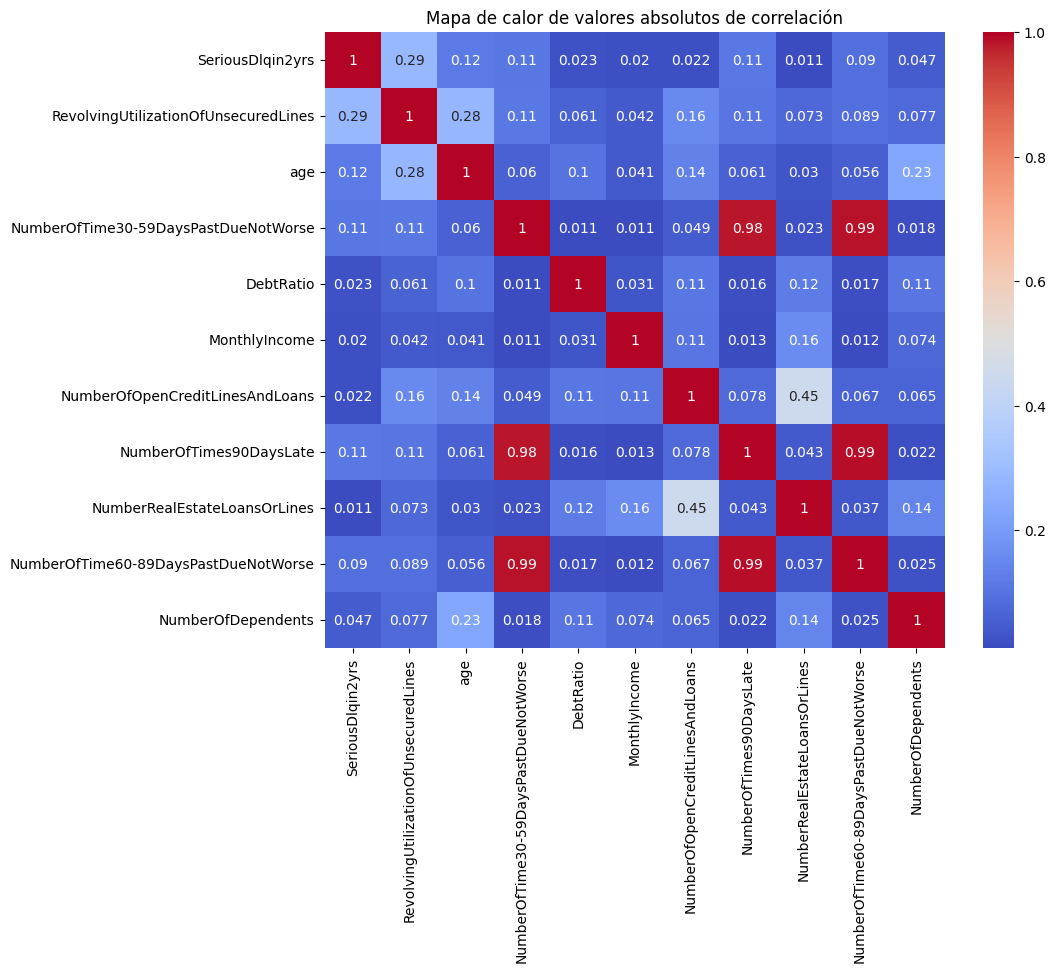

In [17]:
# Crear un mapa de calor de los valores absolutos de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(np.abs(matriz_correlacion), cmap='coolwarm', annot=True)
plt.title('Mapa de calor de valores absolutos de correlación')
plt.show()

Variables escogidas por regresión y por no añadir si tiene colinearidad alta (number of times, hay varias nos quedamos con 90 days)

In [18]:
features= ['RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfTimes90DaysLate' ]

Tratamiento de features: Aplicar logaritmo

Mejor omitir age por que es casi una normal.

In [55]:
# Crear una nueva lista sin 'age'
features_scal = [feature for feature in features if feature != 'age']
features_scal

['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate']

In [56]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supongamos que 'features' es la lista de características que deseas transformar
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTimes90DaysLate']

# Copiar los conjuntos de datos originales
train_set_scal = train_set.copy()
test_set_scal = test_set.copy()

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Procesar el conjunto de datos de entrenamiento
for col in features_scal:
    # Aplicar la transformación logarítmica solo si los valores son positivos
    if (train_set_scal[col] > 0).all():
        train_set_scal[f"log_{col}"] = train_set_scal[col].apply(np.log)
    else:
        print(f"La característica {col} contiene valores no válidos para aplicar logaritmo.")
        train_set_scal[f"sqrt_{col}"] = np.sqrt(train_set_scal[col])

# Escalar las características utilizando StandardScaler
train_set_scal[features_scal] = scaler.fit_transform(train_set_scal[features_scal])

# Procesar el conjunto de datos de prueba
for col in features_scal:
    # Aplicar la transformación logarítmica solo si los valores son positivos
    if (test_set_scal[col] > 0).all():
        test_set_scal[f"log_{col}"] = test_set_scal[col].apply(np.log)
    else:
        print(f"La característica {col} contiene valores no válidos para aplicar logaritmo.")
        test_set_scal[f"sqrt_{col}"] = np.sqrt(test_set_scal[col])




La característica RevolvingUtilizationOfUnsecuredLines contiene valores no válidos para aplicar logaritmo.
La característica NumberOfTimes90DaysLate contiene valores no válidos para aplicar logaritmo.
La característica RevolvingUtilizationOfUnsecuredLines contiene valores no válidos para aplicar logaritmo.
La característica NumberOfTimes90DaysLate contiene valores no válidos para aplicar logaritmo.


In [58]:
# Escalar las características utilizando StandardScaler
test_set_scal[features_scal] = scaler.transform(test_set_scal[features_scal])

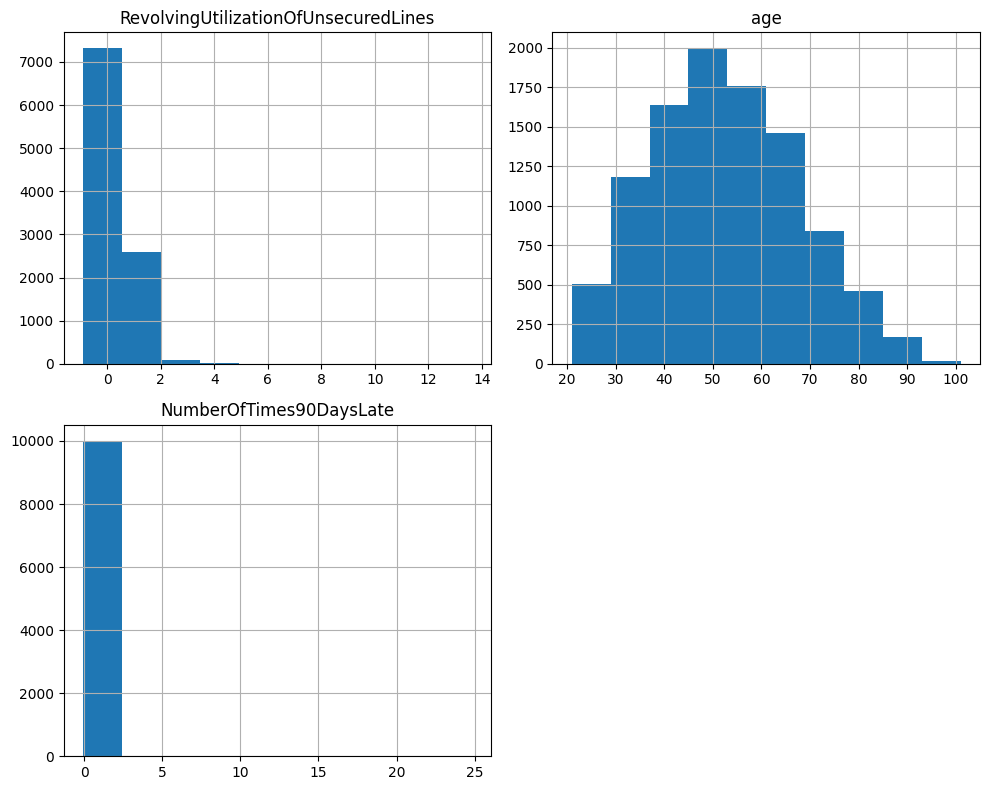

In [59]:
train_set_scal[features].hist(figsize=(10, 8))
plt.tight_layout()

In [60]:
X_train = train_set[features]
y_train = train_set[target]
X_test = test_set[features]
y_test = test_set[target]

X_train_scal = train_set_scal[features]
X_test_scal = test_set_scal[features]


##### Modelado KNN

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scal, y_train)

KNeighborsClassifier()

In [62]:
print('train')
print(classification_report(y_train, knn.predict(X_train_scal)))
print('test')
print(classification_report(y_test, knn.predict(X_test_scal)))

train
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9328
           1       0.70      0.22      0.34       701

    accuracy                           0.94     10029
   macro avg       0.82      0.61      0.65     10029
weighted avg       0.93      0.94      0.92     10029

test
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2345
           1       0.43      0.10      0.16       163

    accuracy                           0.93      2508
   macro avg       0.69      0.54      0.56      2508
weighted avg       0.91      0.93      0.91      2508



In [63]:
param_grid = {
    "n_neighbors": range(1,10),
    "weights": ["uniform","distance"]
}

knn_grid = GridSearchCV(knn, 
                        param_grid = param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

knn_grid.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [64]:
knn_grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [65]:
knn_grid.best_score_

0.5715814339200482

In [66]:
print(classification_report(y_test, knn_grid.best_estimator_.predict(X_test_scal)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2345
           1       0.25      0.25      0.25       163

    accuracy                           0.90      2508
   macro avg       0.60      0.60      0.60      2508
weighted avg       0.90      0.90      0.90      2508



Otros modelos:

Tener en cuenta que KNN lo hemos visto en el apartado anterior sin cross val por lo que es menos exacto y podríamos añadirlo aquí

In [67]:
model_names = ["Logistic Regression","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scal, y_train, cv = 3, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)
Model <Logistic Regression>, Accuracy_CV: 0.5114452579497001
Model <DecisionTree>, 

SMOTE Oversampling

Test Set no se hace SMOTE, para no tocarlo.

In [68]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_scal, y_train_smote_scal = smote.fit_resample(X_train_scal, y_train) 

y_train_smote.value_counts(True)



SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [69]:
X_train_smote.shape



(18656, 3)

In [70]:
X_train.shape


(10029, 3)

Los resultados son muy buenos en el train, pero hay que tener en cuenta qué sucede en el test.

In [71]:
model_names = ["Logistic Regression","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_smote, y_train_smote, cv = 3, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_smote_scal, y_train_smote, cv = 3, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)
Model <Logistic Regression>, Accuracy_CV: 0.7491415856257996
Model <DecisionTree>, 

In [33]:
# Entrenar el modelo con los datos bajomuestreados
smote_lr = LogisticRegression(random_state=42, max_iter = 10000)
smote_lr.fit(X_train_smote, y_train_smote)

# Realizar predicciones y evaluar el modelo
y_pred_bajomuestreo = smote_lr.predict(X_test)
print(classification_report(y_test, y_pred_bajomuestreo))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2345
           1       0.17      0.69      0.28       163

    accuracy                           0.76      2508
   macro avg       0.57      0.73      0.57      2508
weighted avg       0.92      0.76      0.82      2508



Under-sampling

y_train_bajomuestreo = pd.concat([y_train.loc[clase_mayoritaria_bajomuestreo.index], 
 Porque solo aplicamos  el y bajo muestreo en los casos que hemos hecho bajomuestreo de x

In [34]:
# Separar las clases mayoritaria y minoritaria
clase_mayoritaria = X_train[y_train == 0]
clase_minoritaria = X_train[y_train == 1]

# Bajomuestrear la clase mayoritaria
clase_mayoritaria_bajomuestreo = resample(clase_mayoritaria,
                                          replace=False,
                                          n_samples=len(clase_minoritaria),  # igual al número de la clase minoritaria
                                          random_state=42)

# Combinar la clase minoritaria con la clase mayoritaria bajomuestreada (importante es que resample mantiene los índices para que lo que viene a continuación tenga sentido)
X_train_bajomuestreo = pd.concat([clase_mayoritaria_bajomuestreo, clase_minoritaria])
y_train_bajomuestreo = pd.concat([y_train.loc[clase_mayoritaria_bajomuestreo.index], 
                                  y_train.loc[clase_minoritaria.index]])


y_train_bajomuestreo.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [35]:
# Mismos pasos con scaled

# Separar las clases mayoritaria y minoritaria
clase_mayoritaria_scal = X_train_scal[y_train == 0]
clase_minoritaria_scal = X_train_scal[y_train == 1]

clase_mayoritaria_bajomuestreo_scal = resample(clase_mayoritaria_scal,
                                          replace=False,
                                          n_samples=len(clase_minoritaria_scal),  # igual al número de la clase minoritaria
                                          random_state=42)

# Combinar la clase minoritaria con la clase mayoritaria bajomuestreada (importante es que resample mantiene los índices para que lo que viene a continuación tenga sentido)
X_train_bajomuestreo_scal = pd.concat([clase_mayoritaria_scal, clase_minoritaria_scal])
y_train_bajomuestreo_scal = pd.concat([y_train.loc[clase_mayoritaria_scal.index], 
                                  y_train.loc[clase_minoritaria_scal.index]])

In [36]:
model_names = ["Logistic Regression","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_bajomuestreo, y_train_bajomuestreo, cv = 3, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_bajomuestreo_scal, y_train_bajomuestreo_scal, cv = 3, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)
Model <Logistic Regression>, Accuracy_CV: 0.5114452579497001
Model <DecisionTree>, 

Probar Light GBM el classification report.

In [72]:
xgb_clf.fit(X_train_bajomuestreo,y_train_bajomuestreo)
print(classification_report(y_test, xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      2345
           1       0.14      0.69      0.23       163

    accuracy                           0.71      2508
   macro avg       0.56      0.70      0.53      2508
weighted avg       0.92      0.71      0.78      2508



In [37]:
# Entrenar el modelo con los datos bajomuestreados
modelo_bajomuestreo = LogisticRegression(random_state=42, max_iter = 10000)
modelo_bajomuestreo.fit(X_train_bajomuestreo, y_train_bajomuestreo)

# Realizar predicciones y evaluar el modelo
y_pred_bajomuestreo = modelo_bajomuestreo.predict(X_test)
print(classification_report(y_test, y_pred_bajomuestreo))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      2345
           1       0.18      0.71      0.29       163

    accuracy                           0.78      2508
   macro avg       0.58      0.74      0.58      2508
weighted avg       0.92      0.78      0.83      2508



Como el recall promedio mayor 0.74 se obtiene con el bajo muestreo. Se entrena con él.  Aparentemente Catboost es el mejor

### Entrenamiento

* Catboost con x_train es más alto

Catboost:Aunque CatBoost está optimizado para manejar características categóricas, aún puede ser una opción sólida y competitiva para conjuntos de datos sin estas características, gracias a su eficiencia, capacidad de automatización de hiperparámetros, regularización integrada y el poder del algoritmo de impulso de gradiente subyacente.







In [38]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8]
}

# Crear el modelo CatBoost
cat_clf = CatBoostClassifier(random_state=42, verbose=0)

# Configurar GridSearchCV
cat_grid = GridSearchCV(cat_clf, param_grid, cv=3, scoring='balanced_accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
cat_grid.fit(X_train_bajomuestreo, y_train_bajomuestreo)

# Obtener los mejores hiperparámetros
best_params = cat_grid.best_params_
print(f"Mejores hiperparámetros para CatBoost: {best_params}")


Mejores hiperparámetros para CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.01}


In [39]:
cat_grid.best_score_

0.7632209627917783

In [40]:
cat_grid.best_estimator_

In [73]:
print(classification_report(y_train, cat_grid.best_estimator_.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      9328
           1       0.19      0.76      0.31       701

    accuracy                           0.76     10029
   macro avg       0.58      0.76      0.58     10029
weighted avg       0.92      0.76      0.82     10029



In [41]:
print(classification_report(y_test, cat_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      2345
           1       0.18      0.75      0.29       163

    accuracy                           0.76      2508
   macro avg       0.58      0.76      0.58      2508
weighted avg       0.93      0.76      0.82      2508



Pasamos a Random Forest por tener otra opción

In [42]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    "n_estimators": [100, 200],  
    "max_depth": [4, 8],         
    "max_features": ["sqrt", "log2"],  
    "class_weight": ["balanced"]  
}

rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_clf,
                               param_distributions=param_grid_rf,
                               n_iter=20,  # Número de iteraciones, ajustable
                               cv=5,
                               scoring="balanced_accuracy",
                               random_state=42)

rf_random.fit(X_train_bajomuestreo, y_train_bajomuestreo)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [4, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='balanced_accuracy')

In [43]:
rf_random.best_score_


0.7589311043566362

In [44]:
rf_random.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 4,
 'class_weight': 'balanced'}

In [45]:
rf_random.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=4)

Random Forest y Cat Boost obtienen resultados semejantes con bajo muestreo y seleccionando las features

In [46]:
features

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTimes90DaysLate']

In [47]:
print(classification_report(y_test, rf_random.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      2345
           1       0.18      0.75      0.29       163

    accuracy                           0.76      2508
   macro avg       0.58      0.76      0.57      2508
weighted avg       0.93      0.76      0.82      2508



In [48]:
print(classification_report(y_test, cat_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      2345
           1       0.18      0.75      0.29       163

    accuracy                           0.76      2508
   macro avg       0.58      0.76      0.58      2508
weighted avg       0.93      0.76      0.82      2508



Análisis de errores

Nos interesa el recall de la clase positiva 123/(123+40)

Revisar por qué es 0.24

In [79]:
40/(123+40)

0.24539877300613497

In [78]:
123/(123+40)

0.754601226993865

Derrame o lickage los falsos positivo o falsos negativos.

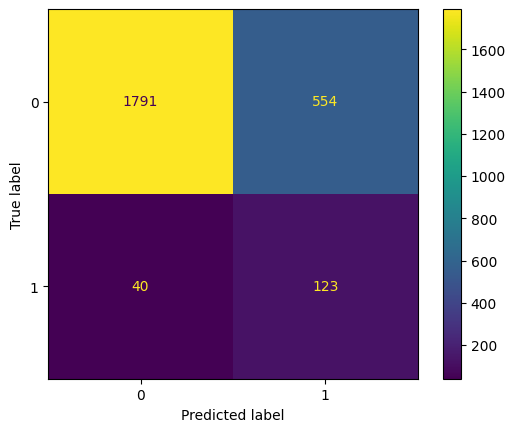

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test,cat_grid.best_estimator_.predict(X_test))

Prediciendo probabilidades con Roc_curve, en función del thresholds 

AUROC: 0.83


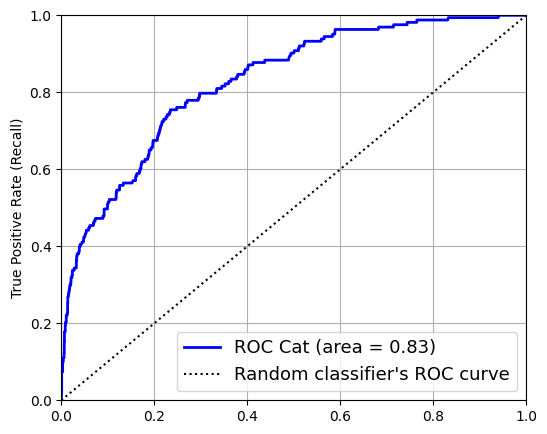

In [83]:
from sklearn.metrics import roc_curve, auc
scores = cat_grid.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Cat (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

AUROC: 0.83


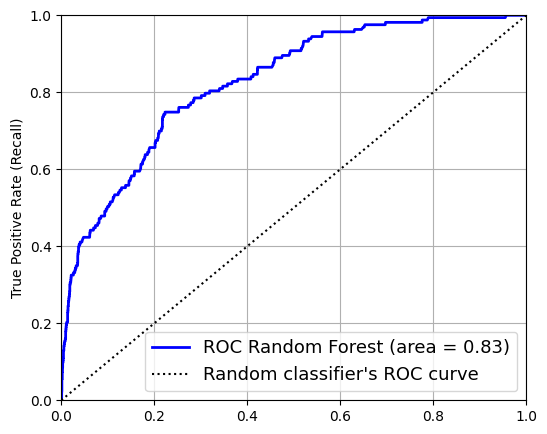

In [84]:
from sklearn.metrics import roc_curve, auc
scores = rf_random.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Random Forest (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)